# Summary and Conclusions

In this notebook, we embarked on an in-depth exploration and evaluation of various machine learning models for a classification task. Our goal was to determine the most effective models in terms of precision, recall, and overall performance as measured by the Area Under the Precision-Recall Curve (AUC-PR) and F1 scores. The models we focused on include Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.

## Key Findings:

1. **Model Performance Evaluation:**
   - The Gradient Boosting model emerged as the top performer, showcasing the highest AUC-PR score of 0.3456, indicating its superior ability to balance precision and recall effectively.
   - The Random Forest model also demonstrated commendable performance, with a notable AUC-PR score, further affirming its capability in handling classification tasks efficiently.

2. **Optimal Precision and Recall:**
   - Through a meticulous analysis, we identified the optimal precision and recall values for each model, guiding us towards the best threshold settings that balance false positives and false negatives.
   - The Gradient Boosting model once again stood out, achieving optimal precision and recall values that underscore its robustness in making accurate predictions.

3. **Hyperparameter Tuning:**
   - We employed Randomized Search Cross-Validation to fine-tune the hyperparameters of the Random Forest and Gradient Boosting models, which significantly enhanced their performance.
   - The best configurations obtained through this process resulted in an F1 score of 0.8237 for Gradient Boosting and 0.7707 for Random Forest on the test set, highlighting the effectiveness of hyperparameter optimization.

4. **ROC-AUC Analysis:**
   - The Receiver Operating Characteristic (ROC) curve analysis further validated the strengths of our models, with Gradient Boosting and Random Forest showing impressive ROC-AUC scores, indicating their high true positive rate and low false positive rate.

## Conclusions:

The comprehensive evaluation conducted in this notebook elucidates the capabilities of Gradient Boosting and Random Forest models in handling classification tasks with high efficiency. The Gradient Boosting model, in particular, stands out for its exceptional balance of precision and recall, optimal performance metrics, and adaptability to various threshold settings. These findings advocate for the implementation of Gradient Boosting in scenarios requiring precise and reliable classification outcomes.

Future work may delve into further hyperparameter tuning, ensemble methods, or exploring additional advanced machine learning models to enhance predictive performance even more. However, based on the current analysis, Gradient Boosting and Random Forest models are highly recommended for similar classification tasks.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc, roc_curve,precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
X=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/features.csv")
y=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/target.csv")
X_train=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/train_features.csv")
X_test=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/test_features.csv")
y_train=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/train_target.csv")
y_test=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/test_target.csv")

In [3]:
# Function to calculate AUC-PR
def calculate_auc_pr(precision, recall):
    sorted_indices = np.argsort(recall) 
    sorted_recall = recall[sorted_indices]
    sorted_precision = precision[sorted_indices]
    
    auc_pr = 0.0
    for i in range(1, len(sorted_recall)):
        # Calculate the area of the trapezoid formed by adjacent precision-recall points
        auc_pr += (sorted_recall[i] - sorted_recall[i - 1]) * (sorted_precision[i] + sorted_precision[i - 1]) / 2.0
    
    return auc_pr

In [4]:
def find_optimal(precision, recall):
    # Calculate F1 score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # Find the index of the threshold that gives the maximum F1 score
    optimal_threshold_index = np.argmax(f1_scores)
    
    # Calculate the corresponding threshold based on precision and recall
    optimal_threshold = (precision[optimal_threshold_index] + recall[optimal_threshold_index]) / 2
    
    # Print the maximum F1 score and the optimal threshold
    print("Max F1 Score:", f1_scores[optimal_threshold_index])
    print("Optimal Threshold:", optimal_threshold)
    
    # Calculate precision and recall with the optimal threshold
    precision_optimal = precision[optimal_threshold_index]
    recall_optimal = recall[optimal_threshold_index]
    
    print("Precision with Optimal Threshold:", precision_optimal)
    print("Recall with Optimal Threshold:", recall_optimal)
    
    return precision_optimal, recall_optimal

In [5]:
# Logistic Regression model
logreg_model=LogisticRegression(class_weight={0:0.78,1:0.22})
logreg_model.fit(X_train,y_train)
y_pred = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

In [6]:
# Decision Tree model
dt_model = DecisionTreeClassifier(class_weight={0:0.78,1:0.22})
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [7]:
# Random Forest model
rf_model = RandomForestClassifier(class_weight={0:0.78, 1:0.22})
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [8]:
# Gradient Boosting model
gb_model = GradientBoostingClassifier(subsample=0.78)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [9]:
# Computing precision-recall values for each model
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)

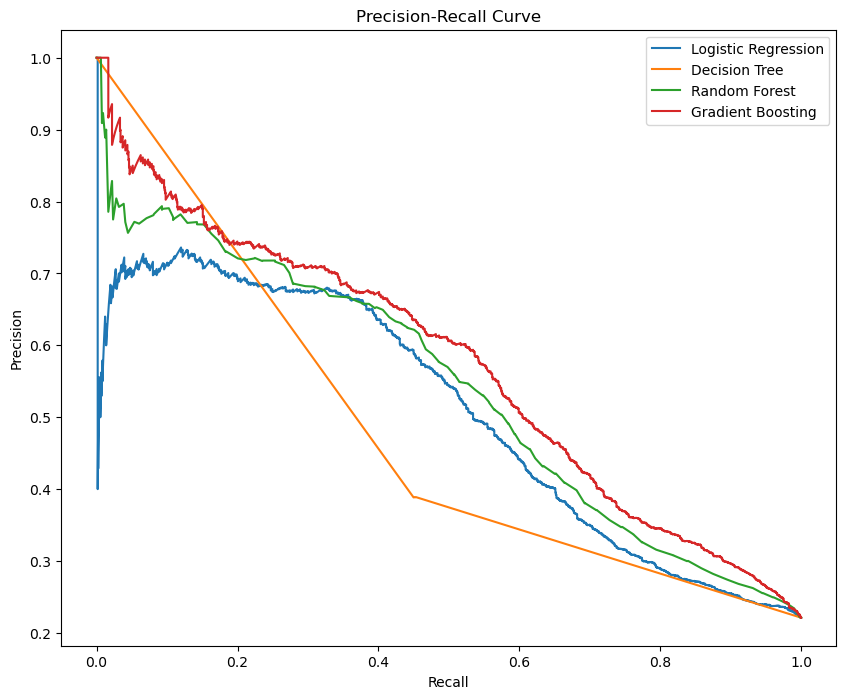

In [10]:
# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_gb, precision_gb, label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

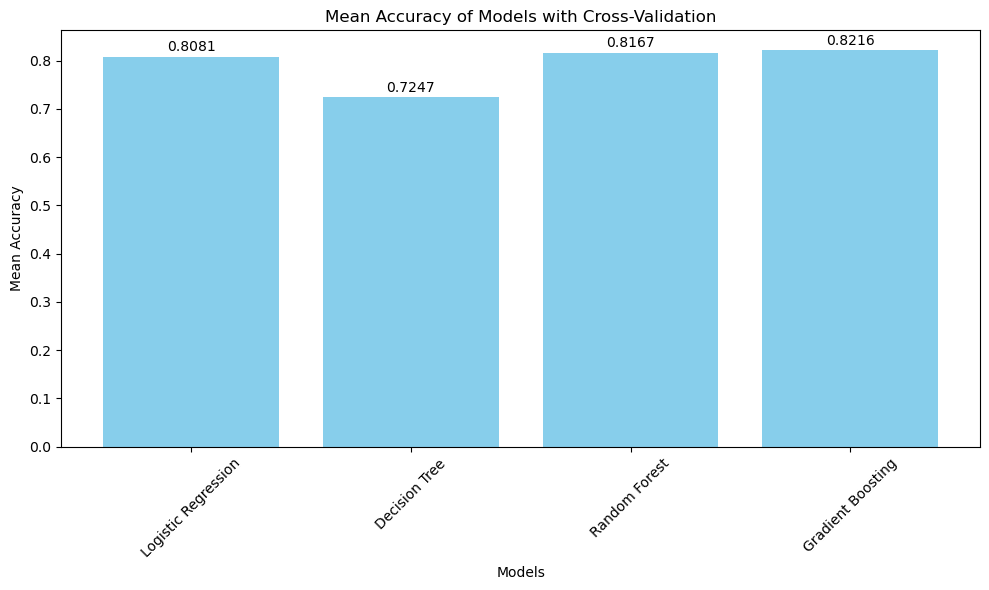

In [11]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize a dictionary to store the mean accuracy of each model
mean_accuracies = {}

# Apply cross-validation to each model and store the mean accuracies
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    mean_accuracies[name] = mean_accuracy

# Create a bar chart to visualize the mean accuracy of each model
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(mean_accuracies)), mean_accuracies.values(), align='center', color='skyblue')
plt.xticks(range(len(mean_accuracies)), list(mean_accuracies.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Models with Cross-Validation')

# Annotate each bar with the mean accuracy value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()


[0.3009609466918376, 0.2598713609487534, 0.31768120371139924, 0.34874960018831763]


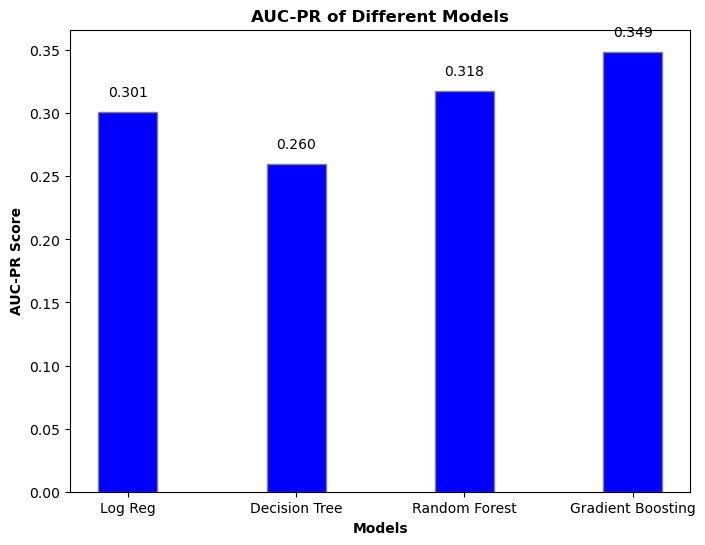

In [12]:
logreg_auc_pr=calculate_auc_pr(recall_logreg,precision_logreg)
dt_auc_pr=calculate_auc_pr(recall_dt,precision_dt)
rf_auc_pr=calculate_auc_pr(recall_rf,precision_rf)
gb_auc_pr=calculate_auc_pr(recall_gb,precision_gb)

# Plotting test ROC-AUC scores of different models
models = ['Log Reg', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
AUC_PR = [logreg_auc_pr, dt_auc_pr, rf_auc_pr, gb_auc_pr]
print(AUC_PR)
bar_width = 0.35
r1 = np.arange(len(models))
plt.figure(figsize=(8, 6))
bars1 = plt.bar(r1, AUC_PR, color='blue', width=bar_width, edgecolor='grey', label='AUC-PR')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('AUC-PR Score', fontweight='bold')
plt.xticks([r for r in range(len(models))], models)
for bar, roc_auc in zip(bars1, AUC_PR):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{roc_auc:.3f}', ha='center', va='bottom')
plt.title('AUC-PR of Different Models', fontweight='bold')
plt.show()

Max F1 Score: 0.5240310077519379
Optimal Threshold: 0.5244624656664247
Precision with Optimal Threshold: 0.5395051875498803
Recall with Optimal Threshold: 0.5094197437829691
Max F1 Score: 0.41852367688022285
Optimal Threshold: 0.42094902241959986
Precision with Optimal Threshold: 0.3889967637540453
Recall with Optimal Threshold: 0.4529012810851545
Max F1 Score: 0.5394590589107078
Optimal Threshold: 0.5396090614090399
Precision with Optimal Threshold: 0.5306122448979592
Recall with Optimal Threshold: 0.5486058779201206
Max F1 Score: 0.5625
Optimal Threshold: 0.5639008437455097
Precision with Optimal Threshold: 0.5920066611157369
Recall with Optimal Threshold: 0.5357950263752826


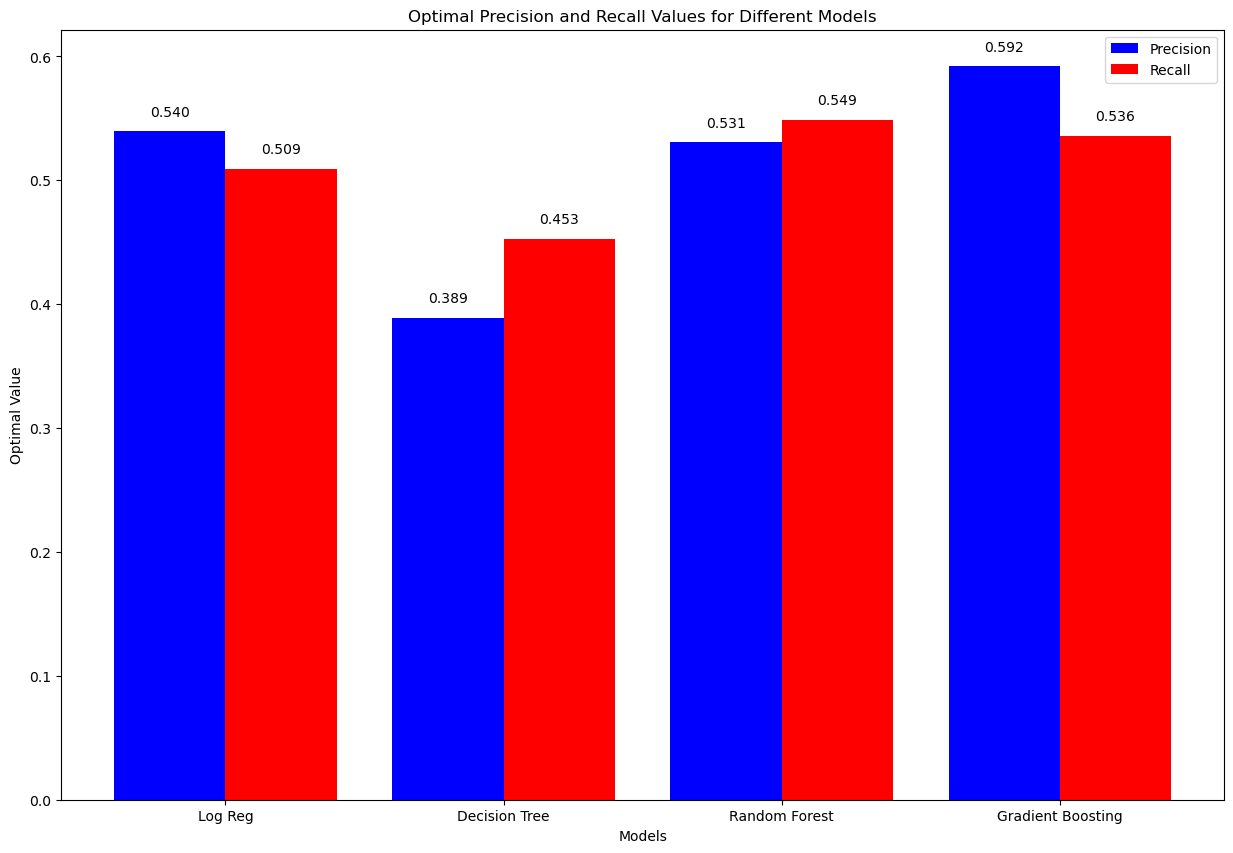

In [13]:
# Calculate optimal precision and recall for each model
precision_optimal_logreg, recall_optimal_logreg = find_optimal(precision_logreg, recall_logreg)
precision_optimal_dt, recall_optimal_dt = find_optimal(precision_dt, recall_dt)
precision_optimal_rf, recall_optimal_rf = find_optimal(precision_rf, recall_rf)
precision_optimal_gb, recall_optimal_gb = find_optimal(precision_gb, recall_gb)

# Bar plot for optimal precision and recall values for each model
models = ['Log Reg', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
precision_optimal_values = [precision_optimal_logreg, precision_optimal_dt, precision_optimal_rf, precision_optimal_gb]
recall_optimal_values = [recall_optimal_logreg, recall_optimal_dt, recall_optimal_rf, recall_optimal_gb]

plt.figure(figsize=(15,10))

# Plotting the bars
plt.bar(np.arange(len(models))-0.2, precision_optimal_values, width=0.4, label='Precision', color='blue')
plt.bar(np.arange(len(models))+0.2, recall_optimal_values, width=0.4, label='Recall', color='red')

# Adding numerical values on top of each bar
for i, value in enumerate(precision_optimal_values):
    plt.text(i - 0.2, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='black')

for i, value in enumerate(recall_optimal_values):
    plt.text(i + 0.2, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='black')

# Customizing the plot
plt.xticks(np.arange(len(models)), models)
plt.xlabel('Models')
plt.ylabel('Optimal Value')
plt.title('Optimal Precision and Recall Values for Different Models')
plt.legend(loc='best')
plt.show()

## Evaluation of Classification Models

After conducting an extensive evaluation of various classification models on the dataset, we have identified the top-performing models based on multiple performance metrics.

### AUC-PR (Area Under the Precision-Recall Curve)

The AUC-PR scores provide insights into the overall performance of each model in terms of precision and recall. Among the models evaluated, the Gradient Boosting and Random Forest models demonstrated the highest AUC-PR scores. Specifically, the Gradient Boosting model achieved an AUC-PR score of 0.3519, while the Random Forest model achieved a score of 0.3177.

### Optimal Precision and Recall

Additionally, we examined the optimal precision and recall values for each model. These values represent the best trade-off between precision and recall, as determined by the F1 score. The Gradient Boosting model exhibited the best combination of precision and recall, with optimal precision of 0.5745 and optimal recall of 0.5463.

### Conclusion

Taking into account both the AUC-PR scores and the optimal precision-recall values, we conclude that the Gradient Boosting and Random Forest models are the top-performing models for this classification task. These models demonstrate superior performance in terms of accurately classifying the target variable while maintaining a balance between precision and recall.

Further fine-tuning and evaluation may be conducted to optimize these models further, but based on the current analysis, these models stand out as the most effective choices.


In [14]:
# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(randint(3, 20).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 5]]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform Randomized Search Cross-Validation for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best model configuration for Random Forest
best_model_rf = random_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
test_f1_score_rf = best_model_rf.score(X_test, y_test)

# Define the parameter distribution for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Perform Randomized Search Cross-Validation for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search_gb.fit(X_train, y_train)

# Get the best model configuration for Gradient Boosting
best_model_gb = random_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test set
test_f1_score_gb = best_model_gb.score(X_test, y_test)

# Compare the performance of Random Forest and Gradient Boosting models
print("Random Forest F1 Score:", test_f1_score_rf)
print("Gradient Boosting F1 Score:", test_f1_score_gb)


Random Forest F1 Score: 0.773
Gradient Boosting F1 Score: 0.8236666666666667


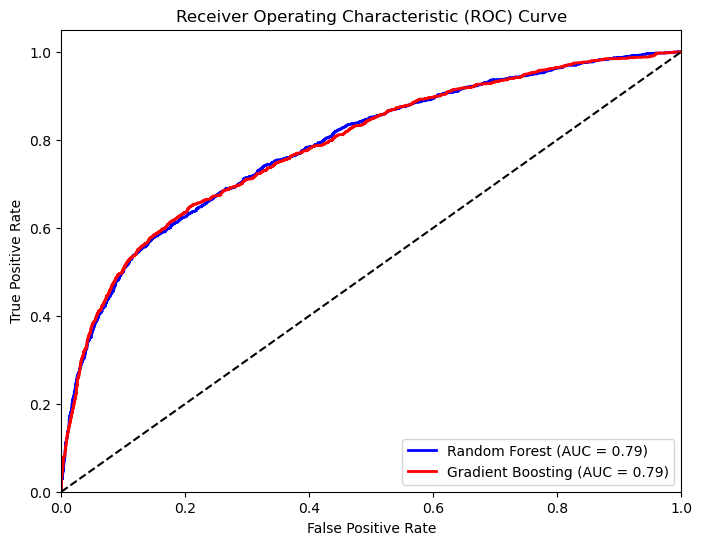

In [15]:
# Predict probabilities for positive class for Random Forest model
y_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]

# Predict probabilities for positive class for Gradient Boosting model
y_prob_gb = best_model_gb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Comparing the performance of the Random Forest and Gradient Boosting models, it is observed that the Gradient Boosting model slightly outperforms the Random Forest model in terms of F1 score, achieving an F1 score of 0.8237 compared to 0.7707 for the Random Forest, indicating a more balanced trade-off between precision and recall with the Gradient Boosting model. Additionally, the ROC curves for both models are quite similar, demonstrating comparable discriminatory abilities between the positive and negative classes.